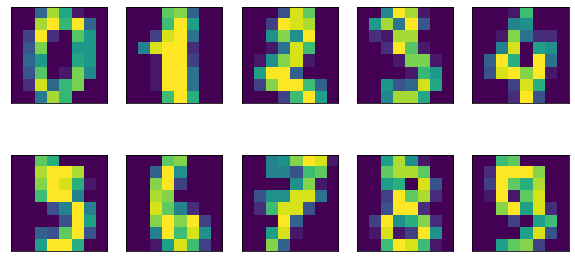

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw = {'xticks': (), 'yticks': ()})


for ax, img in zip(axes.ravel(), digits.images):
  ax.imshow(img)

Text(0, 0.5, 'Second Principal Component')

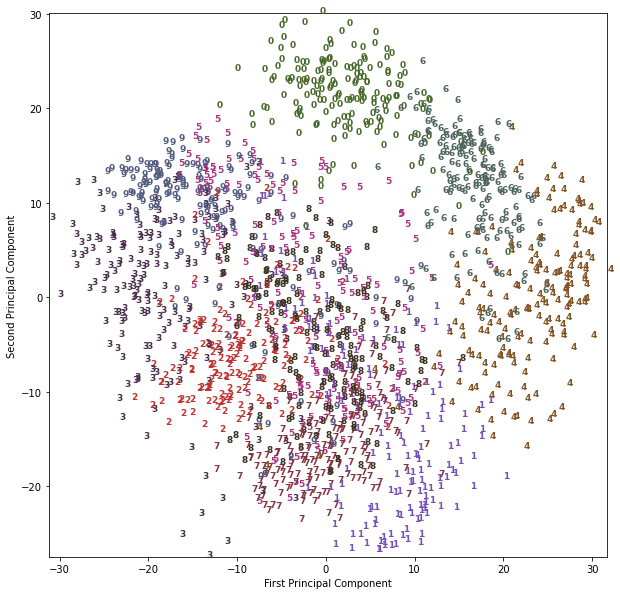

In [2]:
# Building a PCA model

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(digits.data)

# Tranforming the digits data onto the first 2 principal components
digits_pca = pca.transform(digits.data)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D83"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
  plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

In [3]:
# Appling t-SNE for Comparision

from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

#use fit_transform instead of fit, as TSNE as no tranform method. It is also only fitted to the training data.
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE Feature 1')

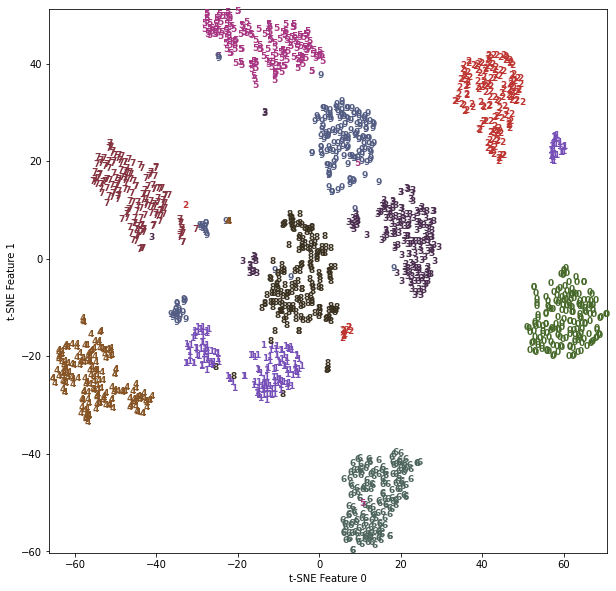

In [5]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
  # Actually plot the digits as text instead of scatter
  plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})

plt.xlabel("t-SNE Feature 0")
plt.ylabel("t-SNE Feature 1")